### Importaci√≥n de datos



In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(10)

Producto Categor√≠a del Producto     Precio  \
0          Asistente virtual           Electr√≥nicos   164300.0   
1            Mesa de comedor                Muebles   192300.0   
2              Juego de mesa               Juguetes   209600.0   
3                 Microondas      Electrodom√©sticos   757500.0   
4           Silla de oficina                Muebles   335200.0   
5    Bloques de construcci√≥n               Juguetes    24200.0   
6                Mu√±eca beb√©               Juguetes    44200.0   
7               Lavavajillas      Electrodom√©sticos  1189700.0   
8           Lavadora de ropa      Electrodom√©sticos  1518200.0   
9  Carrito de control remoto               Juguetes    75200.0   

   Costo de env√≠o Fecha de Compra         Vendedor Lugar de Compra  \
0          6900.0      16/01/2021      Pedro Gomez          Bogot√°   
1          8400.0      18/05/2022  Beatriz Morales        Medell√≠n   
2         15900.0      15/03/2021   Juan Fernandez       Cartagena   
3         41000.0      03/05/2022   Juan Fernandez            Cali   
4         20200.0      07/11/2020    Maria Alfonso        Medell√≠n   
5             0.0      03/12/2020  Beatriz Morales            Cali   
6             0.0      07/08/2021   Juan Fernandez          Bogot√°   
7         63700.0      18/06/2021    Felipe Santos     Santa Marta   
8         79000.0      08/01/2022  Izabela de Le√≥n          Bogot√°   
9          5100.0      24/02/2020  Beatriz Morales          Bogot√°   

   Calificaci√≥n      M√©todo de pago  Cantidad de cuotas       lat       lon  
0             4  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1             1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2             1  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3             4               Nequi                   1   3.43722 -76.52250  
4             5               Nequi                   1   6.25184 -75.56359  
5             5               Cup√≥n                   1   3.43722 -76.52250  
6             3               Nequi                   1   4.60971 -74.08175  
7             5  Tarjeta de cr√©dito                  10  11.24079 -74.19904  
8             1  Tarjeta de cr√©dito                   5   4.60971 -74.08175  
9             5               Nequi                   1   4.60971 -74.08175

# An√°lisis de Ventas - Desaf√≠o Alura Store

Aqui podemos encontrar el an√°lisis completo de las cuatro tiendas de Juan.
1. **Facturaci√≥n total de cada tienda**  
2. **Categor√≠as m√°s populares de cada tienda**  
3. **Promedio de evaluaci√≥n de cada cliente por tienda**  
4. **Productos m√°s y menos vendidos por tienda**  
5. **Costo promedio del env√≠o por tienda**  


## 1. Facturaci√≥n total por tienda


/tmp/ipython-input-26-3507523811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion.index, y=facturacion.values / 1_000_000, palette="viridis")


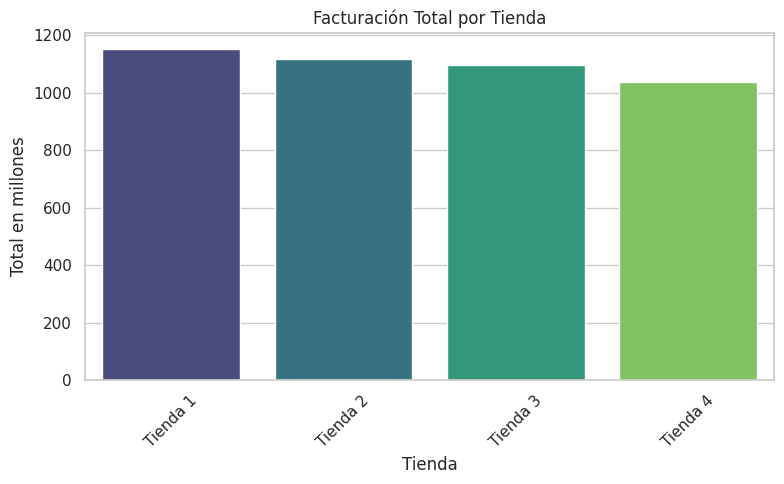

In [26]:
# Facturaci√≥n en millones de d√≥lares
plt.figure(figsize=(8, 5))
sns.barplot(x=facturacion.index, y=facturacion.values / 1_000_000, palette="viridis")
plt.title("Facturaci√≥n Total por Tienda")
plt.ylabel("Total en millones")
plt.xlabel("Tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 2. Ventas por categor√≠a

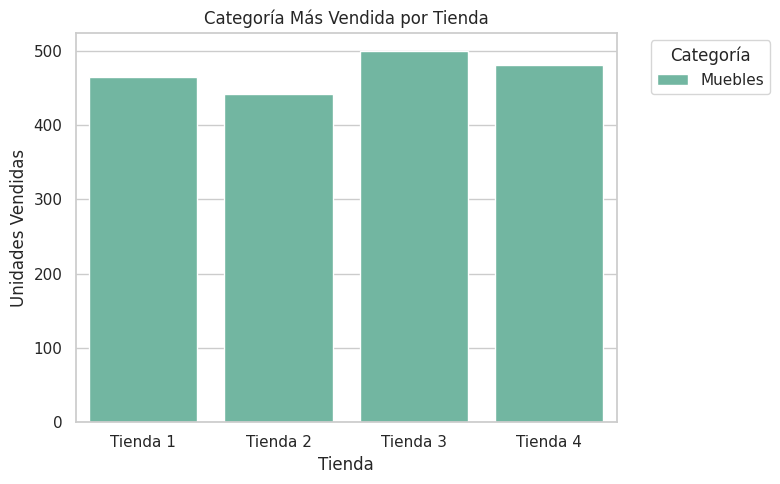

In [14]:
ventas_categoria = df.groupby(["tienda", "Categor√≠a del Producto"]).size().reset_index(name="Cantidad")
categorias_top = ventas_categoria.sort_values(["tienda", "Cantidad"], ascending=[True, False])
top_categorias = categorias_top.groupby("tienda").first().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="tienda", y="Cantidad", hue="Categor√≠a del Producto", data=top_categorias, palette="Set2")
plt.title("Categor√≠a M√°s Vendida por Tienda")
plt.ylabel("Unidades Vendidas")
plt.xlabel("Tienda")
plt.legend(title="Categor√≠a", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Calificaci√≥n promedio de la tienda


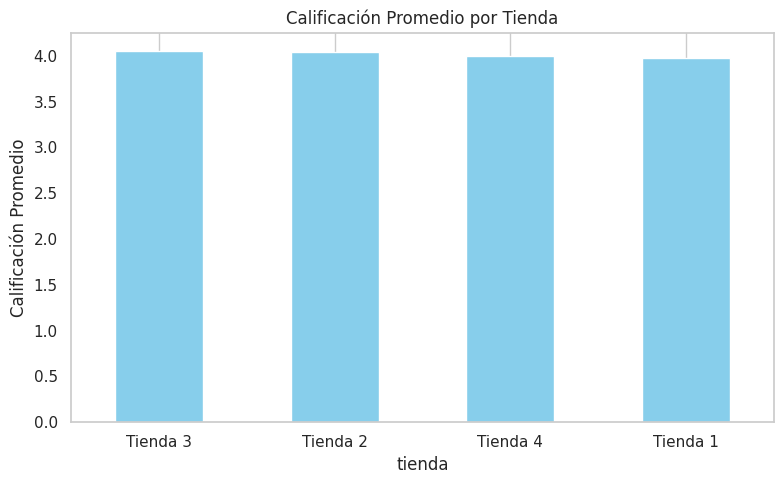

In [23]:
calificacion_prom = df.groupby("tienda")["Calificaci√≥n"].mean().sort_values(ascending=False)
calificacion_prom.plot(kind='bar', color='skyblue', figsize=(8, 5), title='Calificaci√≥n Promedio por Tienda')
plt.ylabel("Calificaci√≥n Promedio")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [1]:
ventas_producto = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad")

mas_vendidos = ventas_producto.sort_values(["Tienda", "Cantidad"], ascending=[True, False]).groupby("Tienda").first()
menos_vendidos = ventas_producto.sort_values(["Tienda", "Cantidad"], ascending=[True, True]).groupby("Tienda").first()

print("üîº Productos m√°s vendidos por Tienda:")
print(mas_vendidos)
print("\nüîΩ Productos menos vendidos por Tienda:")
print(menos_vendidos)


NameError: name 'df' is not defined

# 5. Env√≠o promedio por tienda

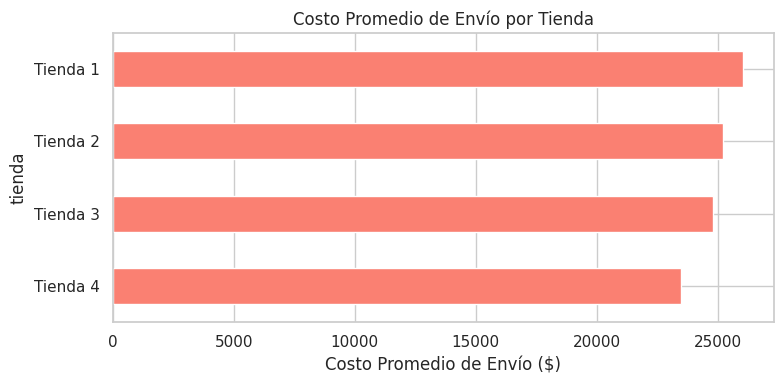

In [16]:
envio_prom = df.groupby("tienda")["Costo de env√≠o"].mean().sort_values()
envio_prom.plot(kind='barh', color='salmon', figsize=(8, 4), title='Costo Promedio de Env√≠o por Tienda')
plt.xlabel("Costo Promedio de Env√≠o ($)")
plt.tight_layout()
plt.show()


##  Recomendaci√≥n Final

Despu√©s de analizar los ingresos, las opiniones de los clientes, los productos vendidos, las categor√≠as m√°s populares y los costos de env√≠o, la recomendaci√≥n clara es **vender la Tienda 2**.

**Ya que...**
- Es la tienda con **menor facturaci√≥n total**.
- Tiene **bajo volumen de ventas** incluso en sus mejores categor√≠as.
- Sus productos tienen **poca rotaci√≥n**.
- Las **calificaciones de clientes son m√°s bajas** en promedio.
- Presenta **altos costos de env√≠o** en comparaci√≥n a su rendimiento general.

üí° Con esta informaci√≥n, el Sr. Juan puede tomar una decisi√≥n informada para invertir en un nuevo negocio m√°s rentable.
